# Autoencoders

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import sklearn

import tensorflow as tf
from tensorflow import keras

import numpy as np

np.random.seed(42)
tf.random.set_seed(42)

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl


In [0]:
# helper function 

def plot_image(image):
    plt.imshow(image)
    plt.axis('off')
plt.show()

## Simplest Autoencoder

In [0]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape

In [0]:
encoding_dim = 32

# input layer
input_img = Input(shape=[784,])

encoded = Dense(encoding_dim, activation='selu')(input_img)

decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [0]:
# encoder model

encoder = Model(input_img, encoded)

# decoder model

encoded_input = Input(shape=[encoding_dim,])

decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

In [7]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

## Load MNIST

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(x_train, _), (x_test, _) = mnist.load_data()

In [11]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [12]:
# Flatten into 2D array and normalise values

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [13]:
# fit model
np.random.seed(42)
tf.random.set_seed(42)

autoencoder.fit(x_train, x_train, 
                epochs=10, 
                batch_size=256, 
                shuffle=True, 
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.6963 - val_loss: 0.6961
Epoch 2/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.6959 - val_loss: 0.6957
Epoch 3/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.6954 - val_loss: 0.6953
Epoch 4/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.6950 - val_loss: 0.6949
Epoch 5/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.6946 - val_loss: 0.6944
Epoch 6/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.6942 - val_loss: 0.6940
Epoch 7/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.6938 - val_loss: 0.6936
Epoch 8/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.6934 - val_loss: 0.6932
Epoch 9/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.6930 - val_

In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [15]:
decoded_imgs.shape

(10000, 784)

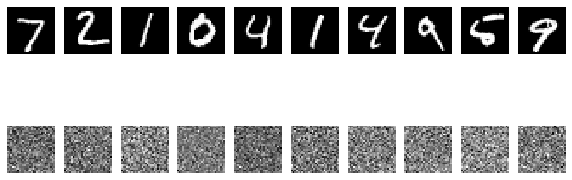

In [16]:
n = 10  # how many digits we will display
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')
plt.show()

In [0]:
from tensorflow.keras import regularizers

In [0]:
# Alternative Stacked Ae with Activity regularizer

stacked_encoder = Sequential(
    [
     Input(shape=[784, ]),
     Dense(100, activation='selu', activity_regularizer=regularizers.l1(10e-5)),
     Dense(encoding_dim, activation='selu', activity_regularizer=regularizers.l1(10e-5))
    ]
)

stacked_decoder = Sequential(
    [
     Input(shape=(encoding_dim,)),
     Dense(100, activation='selu'),
     Dense(784, activation='sigmoid')
    ]
)

In [0]:
stacked_ae = Sequential([stacked_encoder, stacked_decoder])

In [0]:
stacked_ae.compile(optimizer=tf.keras.optimizers.SGD(lr=1.5), loss='binary_crossentropy')

In [21]:
# fit

np.random.seed(42)
tf.random.set_seed(42)

stacked_ae.fit(x_train, x_train, 
                epochs=10, 
                batch_size=256, 
                shuffle=True, 
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2848 - val_loss: 0.2362
Epoch 2/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2128 - val_loss: 0.1924
Epoch 3/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1847 - val_loss: 0.1747
Epoch 4/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1695 - val_loss: 0.1633
Epoch 5/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1592 - val_loss: 0.1532
Epoch 6/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1521 - val_loss: 0.1478
Epoch 7/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1464 - val_loss: 0.1412
Epoch 8/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1414 - val_loss: 0.1378
Epoch 9/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1369 - val_

In [0]:
stacked_encoder_imgs = stacked_encoder.predict(x_test)

stacked_decoded_imgs = stacked_decoder.predict(stacked_encoder_imgs)

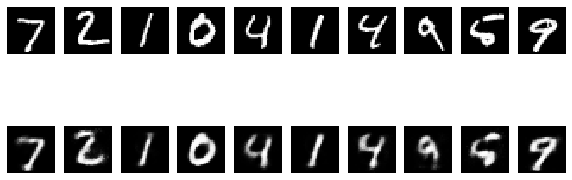

In [23]:
n = 10  # how many digits we will display
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(stacked_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')
plt.show()

### Show Reconstructions

In [0]:
# utility function to show reconstructions

def show_reconstructions(model, images = x_test, n_images=10):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_idx in range(n_images):
        plt.subplot(2, n_images, image_idx + 1)
        # original
        plot_image(images[image_idx].reshape(28, 28))
        # model images
        plt.subplot(2, n_images, image_idx + 1 + n_images)
        plot_image(reconstructions[image_idx].reshape(28, 28))
plt.show()

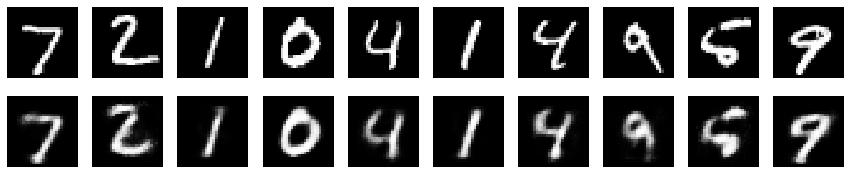

In [25]:
show_reconstructions(stacked_ae)

In [26]:
print(stacked_encoder_imgs.mean())

1.4120773


## Convolutional Autoencoder

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, UpSampling2D, Conv2DTranspose

In [6]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [0]:
np.random.seed(42)
tf.random.set_seed(42)

conv_encoder = Sequential(
    [
     Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=[28, 28, 1]),
     MaxPool2D(pool_size=2, padding='same'),
     Conv2D(8, kernel_size=3, padding='same', activation='selu'),
     MaxPool2D(pool_size=2, padding='same'),
     Conv2D(8, kernel_size=3, padding='same', activation='selu'),
     MaxPool2D(pool_size=2, padding='same')
    ]
)

# output representation is [4, 4, 8] -> 128 dimensional

conv_decoder = Sequential(
    [
     Conv2D(8, (3, 3),  activation='selu', padding='same', input_shape=[4, 4, 8]),
     UpSampling2D(size=(2, 2)),
     Conv2D(8, (3, 3), activation='selu', padding='same'),
     UpSampling2D((2, 2)),
     Conv2D(16, (3, 3), activation='selu'),
     UpSampling2D((2, 2)),
     Conv2D(1, (3, 3), activation='sigmoid', padding='same')
    ]
)

In [14]:
conv_encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
Total params: 1,904
Trainable params: 1,904
Non-trainable params: 0
______________________________________________________

In [15]:
conv_decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 1)        

In [0]:
conv_autoencoder = Sequential([conv_encoder, conv_decoder])

In [0]:
tf.keras.backend.clear_session()

In [18]:
conv_autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 4, 4, 8)           1904      
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28, 1)         2481      
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [0]:
conv_autoencoder.compile(optimizer=tf.keras.optimizers.Adadelta(), loss='binary_crossentropy')

In [20]:
conv_autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 10s 174us/sample - loss: 0.7186 - val_loss: 0.6877
Epoch 2/25
60000/60000 [==============================] - 3s 55us/sample - loss: 0.6488 - val_loss: 0.6026
Epoch 3/25
60000/60000 [==============================] - 3s 55us/sample - loss: 0.5517 - val_loss: 0.5059
Epoch 4/25
60000/60000 [==============================] - 3s 55us/sample - loss: 0.4737 - val_loss: 0.4498
Epoch 5/25
60000/60000 [==============================] - 3s 55us/sample - loss: 0.4268 - val_loss: 0.4078
Epoch 6/25
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3865 - val_loss: 0.3685
Epoch 7/25
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3501 - val_loss: 0.3346
Epoch 8/25
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3208 - val_loss: 0.3092
Epoch 9/25
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2997 - va

In [0]:
conv_decoded_imgs = conv_autoencoder.predict(x_test)

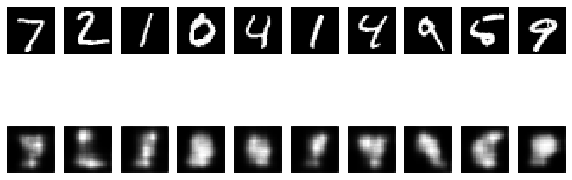

In [22]:
n = 10  
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(conv_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')
plt.show()

In [23]:
conv_encoded_imgs = conv_encoder.predict(x_test)

conv_encoded_imgs.shape

(10000, 4, 4, 8)

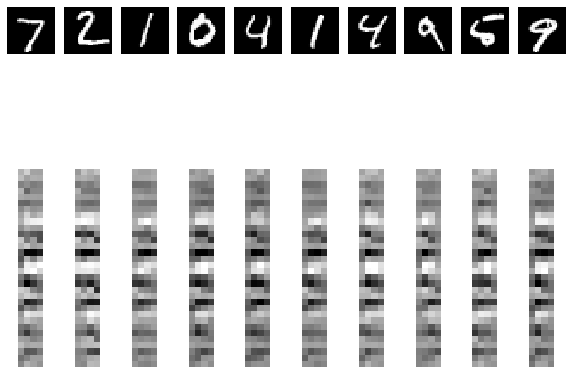

In [24]:
# visualise encoded representations

n = 10
plt.figure(figsize=(10, 8))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(conv_encoded_imgs[i].reshape(4, 4*8).T)
    plt.gray()
    plt.axis('off')